## Vienna Appartments Web Scraping to Choropleth Map Project

    As I am moving to Vienna, I was in search of an appartment and one of the questions I got asked many times is what district I planning to go to. I had no idea about the districts, so I decided to start by looking for the average appartment rental prices and it turned out to be a nice data project. 

### Steps

    1. I am scraping the willhaben website for all the listed rental appartments;
    
    2. Data cleaning and modelling - scraped data never comes clean, so I cleaned it and found what I needed the most - an average (mean) rental price per square meter for every district;
    
    3. Joining different Data - now that I have a dataframe with the mean rental prices per sq.m, I am joining it to a file with geographical data of Vienna to be able to plot it;
    
    4. Plotting the mean rental prices per sq.m onto a Vienna map with district, where a coloscheme reflects the price;
    
    5. Choosing an appartment(okay that does not go into this project...).


<b> Feel free to scroll all the way down for the result </b>



#### The Author

    Hi! I am Andrei. Most of my life I was in Humanities and then suddenly realised that I like statistics and since recently also programming (I am yet to become good at both of those). So I am changing my career to Data Analytics. Currently, I am learning, reading, practicing Machine Learning and my next project will be applying Linear Regression to this data set with close-to-full understanding of what I am doing.
    
    Feel free to contact me if you have questions about this project (I would be happy to explain if you do not understand something, as I myself got through it by scanning lots of Internet an figuring it out by doing).

    My email - andrei.bandurevski@gmail.com

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
import pandas as pd
import random
import numpy as np

In [2]:
property_descriptions = [] #empty list to put the data in for the data frame 

#i'm going to randomly pick each time a header, to avoid getting blocked by the site
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36"
]

page_number = 1

while True:
    #for this project i am using only one website with rental appartemnts
    url = f'https://www.willhaben.at/iad/immobilien/mietwohnungen/wien?page={page_number}' 
    headers = {'User-Agent': random.choice(user_agents)}
    
    web_page = requests.get(url, headers=headers)
    
    if web_page.status_code == 200: #checking if the response was succesful
        soup = BeautifulSoup(web_page.content, 'html.parser')
        property_page = soup.find('div', class_='Box-sc-wfmb7k-0 sc-e6e65d9a-0 eCrUsU bRCDJD')
        
        if not property_page:
            print(f"No properties found on page {page_number}. Stopping.")
            break

        properties = property_page.find_all('div', class_='Box-sc-wfmb7k-0 khNDPc') #this is a grid where the properties are listed on the site

        if not properties:
            print(f"No more properties to process. Stopping at page {page_number}.")
            break
            
        # adding the x_elem to check if the element exist before inputing it into the df, if it does then N/A
        for property_ in properties:
            price_elem = property_.find('span', class_='Text-sc-10o2fdq-0 sc-b4c02c1e-3 hUgELZ iJcdrF')
            price = price_elem.text.strip() if price_elem else None
            
            details = property_.find_all('span', class_="Text-sc-10o2fdq-0 djYXLM")
            
            #surface and # of bedrooms share the same html code in each property box, 
            #so we check for all such instances and take the first and the second occurance
            #and interpret it as surface and number of bedrooms respectively
            
            surface = details[0].text.strip() if len(details) > 0 else None
            bedrooms = details[1].text.strip() if len(details) > 1 else None
            
            address_elem = property_.find('span', class_='Text-sc-10o2fdq-0 jqrIwa')
            address = address_elem.text.strip() if address_elem else None


            #addding scraped data to the list 
            property_descriptions.append({
                'address': address,
                'surface': surface,
                'bedrooms': bedrooms,
                'price': price
            })

        print(f'Page {page_number} processed.') #this helps to track the progress of scraping
        page_number += 1  #move to the next page
    else:
        print(f"Failed to retrieve page {page_number}. Status code: {web_page.status_code}")
        break

#convert results to a DataFrame
df = pd.DataFrame(property_descriptions)
df.head()

Page 1 processed.
Page 2 processed.
Page 3 processed.
Page 4 processed.
Page 5 processed.
Page 6 processed.
Page 7 processed.
Page 8 processed.
Page 9 processed.
Page 10 processed.
Page 11 processed.
Page 12 processed.
Page 13 processed.
Page 14 processed.
Page 15 processed.
Page 16 processed.
Page 17 processed.
Page 18 processed.
Page 19 processed.
Page 20 processed.
Page 21 processed.
Page 22 processed.
Page 23 processed.
Page 24 processed.
Page 25 processed.
Page 26 processed.
Page 27 processed.
Page 28 processed.
Page 29 processed.
Page 30 processed.
Page 31 processed.
Page 32 processed.
Page 33 processed.
Page 34 processed.
Page 35 processed.
Page 36 processed.
Page 37 processed.
Page 38 processed.
Page 39 processed.
Page 40 processed.
Page 41 processed.
Page 42 processed.
Page 43 processed.
Page 44 processed.
Page 45 processed.
Page 46 processed.
Page 47 processed.
Page 48 processed.
Page 49 processed.
Page 50 processed.
Page 51 processed.
Page 52 processed.
Page 53 processed.
Pa

,address,surface,bedrooms,price
0,"1220 Wien, 22. Bezirk, Donaustadt, Wagramer St...",35,1,"€ 1.200,10"
1,"1210 Wien, 21. Bezirk, Floridsdorf, Floridusgasse",52,2,"€ 1.079,99"
2,"1120 Wien, 12. Bezirk, Meidling, Lore-Kutscher...",49,2,€ 890
3,"1110 Wien, 11. Bezirk, Simmering, Rosa-Jochman...",38,1,"€ 648,10"
4,"1210 Wien, 21. Bezirk, Floridsdorf, Leopoldaue...",77,3,"€ 1.393,08"


In [5]:
df.to_csv('vienna_homes_willhaben.csv', index=False) #saving raw data in case i need to get back to it

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   731 non-null    object
 1   surface   728 non-null    object
 2   bedrooms  721 non-null    object
 3   price     703 non-null    object
dtypes: object(4)
memory usage: 23.2+ KB


In [9]:
#scraped data has data type of an object for all columns and we have some missing values

#cleaning time

#first remove the currency sign from the price column
df['price'] = df['price'].str.strip().str[1:]

In [11]:
#removing dots that are used on the website for distinguishing between thousands
df['price']= df['price'].str.replace('.', '') 

In [13]:
#replacing the commas with dots and finally converting the price to numerical format
df['price']= df['price'].str.replace(',', '.')
df['price']= pd.to_numeric(df['price'])

In [15]:
#convertng the surface and bedrooms to number format
df['surface'] = pd.to_numeric(df['surface'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

In [17]:
#in previous tries it sometimes gave inputs of +infinity
#first then convert it N/A and then i drop all N/A as we have sufficient number of entries

df.replace(np.inf, np.nan, inplace=True)
df.dropna(inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 737
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   693 non-null    object 
 1   surface   693 non-null    float64
 2   bedrooms  693 non-null    float64
 3   price     693 non-null    float64
dtypes: float64(3), object(1)
memory usage: 27.1+ KB


In [ ]:
#so now we have the right data formats, and even if number of bedrooms is a categorical feature
#it is more convenient to have it as a number

In [21]:
#to answer the question which is the most expensive district where to rent an appartment
#we need to add the district column and extract the district code from the address string
#i also convert it to numerical format for convinience purposes

df['district'] = df['address'].str.extract(r'(\d+)\. Bezirk')
df['district'] = pd.to_numeric(df['district'], errors= 'coerce')
df.head()

,address,surface,bedrooms,price,district
0,"1220 Wien, 22. Bezirk, Donaustadt, Wagramer St...",35.0,1.0,1200.10,22
1,"1210 Wien, 21. Bezirk, Floridsdorf, Floridusgasse",52.0,2.0,1079.99,21
2,"1120 Wien, 12. Bezirk, Meidling, Lore-Kutscher...",49.0,2.0,890.00,12
3,"1110 Wien, 11. Bezirk, Simmering, Rosa-Jochman...",38.0,1.0,648.10,11
4,"1210 Wien, 21. Bezirk, Floridsdorf, Leopoldaue...",77.0,3.0,1393.08,21


In [23]:
#now i'll add a column of rental price per square meter by dividing the rental price by the surface

df['price_per_sq_meter'] = df['price'] / df['surface']
df.head()

,address,surface,bedrooms,price,district,price_per_sq_meter
0,"1220 Wien, 22. Bezirk, Donaustadt, Wagramer St...",35.0,1.0,1200.10,22,34.288571
1,"1210 Wien, 21. Bezirk, Floridsdorf, Floridusgasse",52.0,2.0,1079.99,21,20.769038
2,"1120 Wien, 12. Bezirk, Meidling, Lore-Kutscher...",49.0,2.0,890.00,12,18.163265
3,"1110 Wien, 11. Bezirk, Simmering, Rosa-Jochman...",38.0,1.0,648.10,11,17.055263
4,"1210 Wien, 21. Bezirk, Floridsdorf, Leopoldaue...",77.0,3.0,1393.08,21,18.091948


In [25]:
df.describe() 
#to check if there are no mistakes so far and also get a little insight into the data set

,surface,bedrooms,price,district,price_per_sq_meter
count,693.000000,693.000000,693.000000,693.000000,693.000000
mean,76.018759,2.637807,1591.763175,14.356421,21.016303
std,43.321769,1.063103,1208.283973,7.250370,7.306249
min,10.000000,1.000000,46.000000,1.000000,1.333111
25%,48.000000,2.000000,939.990000,9.000000,16.915000
50%,64.000000,2.000000,1270.000000,15.000000,19.515455
75%,89.000000,3.000000,1846.800000,22.000000,23.326087
max,471.000000,7.000000,17325.000000,23.000000,109.635100


In [29]:
#the rental price of 17325 EUR seems a bit too high, let's check out the appartment

df[df['price'] == 17325]

,address,surface,bedrooms,price,district,price_per_sq_meter
578,"1010 Wien, 01. Bezirk, Innere Stadt",382.0,6.0,17325.0,1,45.353403


In [ ]:
#ok i just checked the website and there actually is an appartment that costs 17 thousand EUR per month
#so it was not a mistake during data cleaning

#17 thousand per month...wow

#that is such an outlier that it might be one of the reasons why the mean rental price 300 euros higher than the median

In [31]:
df.to_csv('clean_vienna_homes_willhaben.csv', index=False) #saving the clean data set, just in case

In [33]:
#now time to make a map of Vienna districts with a colorscheme
#that reflects the avarage rental price per square meter

#importing libraries

import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [57]:
#calculating the mean rental price per square meter for each district

district_mean_price_per_sq = pd.pivot_table(df, index=['district'], aggfunc={'price_per_sq_meter': 'mean'})
district_mean_price_per_sq

,price_per_sq_meter
district,
1,27.221188
2,22.273549
3,22.976141
4,22.298769
5,22.737835
6,22.713426
7,24.198384
8,22.030337
9,26.087627


In [59]:
vienna = gpd.read_file(r'C:\Users\andre\Python Projects\vienna_.geojson') #importing the vienna shape file with districts 
vienna.head()

C:\Anaconda\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Anaconda\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


,name,cartodb_id,created_at,updated_at,geometry
0,Josefstadt,1,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.34915 48.21516, 16.35099 48..."
1,Alsergrund,2,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.36165 48.23192, 16.36166 48..."
2,Favoriten,3,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.38382 48.18516, 16.38404 48..."
3,Simmering,4,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.42520 48.18575, 16.42604 48..."
4,Meidling,5,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.34174 48.18847, 16.34184 48..."


In [61]:
#cartodb_id does not correspond to district code, so i made a quick file with the right district codes

correct_district_numbers=pd.read_csv(r'C:\Users\andre\Downloads\vienna districts - Sheet1.csv')
correct_district_numbers.head()

,district,distric_name
0,1,Innere Stadt
1,2,Leopoldstadt
2,3,Landstraße
3,4,Wieden
4,5,Margareten


In [63]:
#it's time to put all the dataframes together

vienna_complete= pd.merge(vienna, #first the dataframe from vienna shapefile 
                          district_mean_price_per_sq.merge(correct_district_numbers, how='outer', on='district'), 
                          #here i merge the dataframe of average rental prices per sq.m with the file of districts with right district codes 
                          
                          how='outer', left_on='name', right_on='distric_name')
vienna_complete.head()

,name,cartodb_id,created_at,updated_at,geometry,district,price_per_sq_meter,distric_name
0,Alsergrund,2,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.36165 48.23192, 16.36166 48...",9,26.087627,Alsergrund
1,Brigittenau,19,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.37361 48.26127, 16.37734 48...",20,17.277473,Brigittenau
2,Donaustadt,21,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.50784 48.27345, 16.50903 48...",22,20.706577,Donaustadt
3,Döbling,18,2013-11-29 19:08:42+01:00,2013-11-29 19:13:26+01:00,"MULTIPOLYGON (((16.35681 48.28229, 16.35803 48...",19,19.963062,Döbling
4,Favoriten,3,2013-11-29 19:08:42+01:00,2013-11-29 19:08:42+01:00,"MULTIPOLYGON (((16.38382 48.18516, 16.38404 48...",10,18.988011,Favoriten


In [65]:
#we have now the complete dataframe with the geometry of districts, the rental prices per sq.m and the right district codes
#i'll remove the rest
#we have the district name column twice, so one get's out as well
 

vienna_complete.drop(['distric_name', 'cartodb_id', 'created_at', 'updated_at'], axis=1, inplace= True)
vienna_complete.rename(columns= {'district': 'district_code'}, inplace=True)
vienna_complete.head()

,name,geometry,district_code,price_per_sq_meter
0,Alsergrund,"MULTIPOLYGON (((16.36165 48.23192, 16.36166 48...",9,26.087627
1,Brigittenau,"MULTIPOLYGON (((16.37361 48.26127, 16.37734 48...",20,17.277473
2,Donaustadt,"MULTIPOLYGON (((16.50784 48.27345, 16.50903 48...",22,20.706577
3,Döbling,"MULTIPOLYGON (((16.35681 48.28229, 16.35803 48...",19,19.963062
4,Favoriten,"MULTIPOLYGON (((16.38382 48.18516, 16.38404 48...",10,18.988011


In [67]:
#i'll save this file
vienna_complete.to_file("vienna_districts_mean_price.json", driver="GeoJSON")

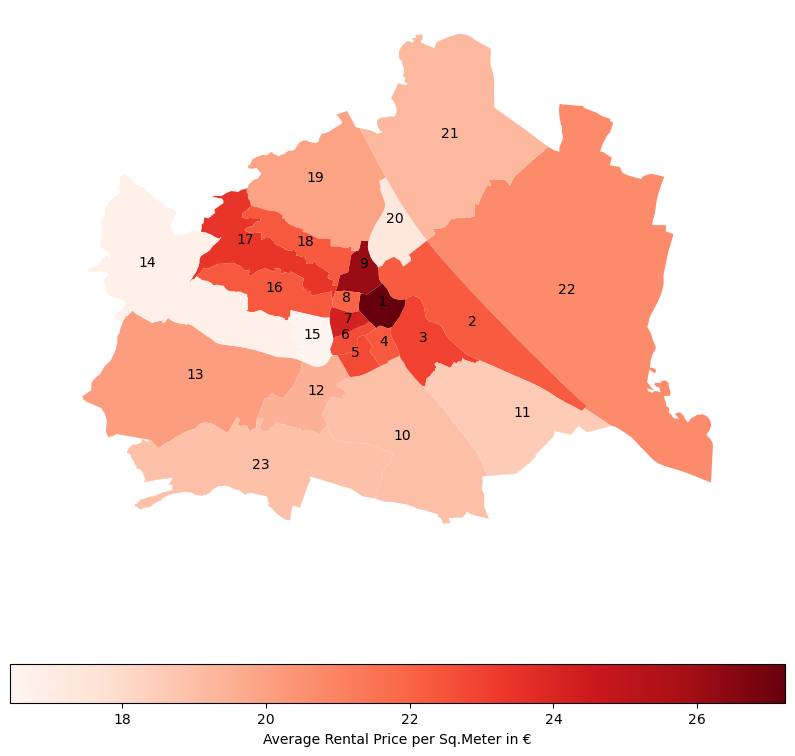

In [75]:
#it's time to visualize how expensive (on average) it is to rent an appartment in each district

#i don't know the districts so well, so i am going to annotate them with a district code
#for that i'll take a coordinate inside of every district and add the district code onto those coordinates

vienna_complete['coords'] = vienna_complete['geometry'].apply(lambda x: x.representative_point().coords[:])
vienna_complete['coords'] = [coords[0] for coords in vienna_complete['coords']]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

vienna_complete.plot(column='price_per_sq_meter', 
                     ax=ax, 
                     cmap='Reds', 
                     legend=True,
                     legend_kwds={"label": "Average Rental Price per Sq.Meter in €", "orientation": "horizontal"},
).set_axis_off()

for idx, row in vienna_complete.iterrows():
    plt.annotate(text=row['district_code'], xy=row['coords'], horizontalalignment='center', color='black')